# K-Means for Hearing Threshold Data Clustering

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load the data
file_path = "../data/nhanes_1720.csv"
data = pd.read_csv(file_path)
data

,AUXU500R,AUXU1K1R,AUXU2KR,AUXU3KR,AUXU4KR,AUXU6KR,AUXU8KR,AUXU500L,AUXU1K1L,AUXU2KL,AUXU3KL,AUXU4KL,AUXU6KL,AUXU8KL
0,5.0,0.0,10.0,5.0,10.0,5.0,15.0,5.0,0.0,-5.0,5.0,0.0,5.0,15.0
1,15.0,10.0,10.0,5.0,0.0,15.0,-5.0,10.0,15.0,5.0,5.0,5.0,0.0,0.0
2,20.0,25.0,5.0,5.0,10.0,10.0,10.0,25.0,20.0,5.0,5.0,10.0,10.0,20.0
3,5.0,0.0,0.0,5.0,0.0,10.0,15.0,5.0,5.0,-5.0,5.0,-5.0,0.0,15.0
4,5.0,0.0,10.0,10.0,15.0,5.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,888.0,5.0,5.0,888.0,0.0,888.0,0.0,888.0,0.0,-5.0,888.0,5.0,888.0,10.0
5143,25.0,30.0,40.0,35.0,55.0,70.0,666.0,20.0,40.0,45.0,45.0,60.0,85.0,666.0
5144,30.0,20.0,5.0,25.0,15.0,30.0,45.0,35.0,30.0,15.0,30.0,25.0,55.0,60.0
5145,888.0,5.0,5.0,888.0,0.0,888.0,30.0,888.0,5.0,10.0,888.0,10.0,888.0,15.0


In [4]:
print(data.head())

   AUXU500R  AUXU1K1R  AUXU2KR  AUXU3KR  AUXU4KR  AUXU6KR  AUXU8KR  AUXU500L  \
0       5.0       0.0     10.0      5.0     10.0      5.0     15.0       5.0   
1      15.0      10.0     10.0      5.0      0.0     15.0     -5.0      10.0   
2      20.0      25.0      5.0      5.0     10.0     10.0     10.0      25.0   
3       5.0       0.0      0.0      5.0      0.0     10.0     15.0       5.0   
4       5.0       0.0     10.0     10.0     15.0      5.0      0.0       5.0   

   AUXU1K1L  AUXU2KL  AUXU3KL  AUXU4KL  AUXU6KL  AUXU8KL  
0       0.0     -5.0      5.0      0.0      5.0     15.0  
1      15.0      5.0      5.0      5.0      0.0      0.0  
2      20.0      5.0      5.0     10.0     10.0     20.0  
3       5.0     -5.0      5.0     -5.0      0.0     15.0  
4       0.0      0.0      5.0      5.0      5.0      5.0  


In [5]:
desired_order = [
    'AUXU500R', 'AUXU1K1R', 'AUXU2KR', 'AUXU3KR', 'AUXU4KR', 'AUXU6KR', 'AUXU8KR',  # Right Ear
    'AUXU500L', 'AUXU1K1L', 'AUXU2KL', 'AUXU3KL', 'AUXU4KL', 'AUXU6KL', 'AUXU8KL'   # Left Ear
]

# Reorder the columns
data = data[desired_order]

# # Inspect the reordered columns
# print("Reordered Columns:")
# print(data.columns)

# # Save the reordered dataset
# output_file_path = "NHANES/reordered_hearing_data.csv"
# data.to_csv(output_file_path, index=False)

In [6]:
print(data.head())

   AUXU500R  AUXU1K1R  AUXU2KR  AUXU3KR  AUXU4KR  AUXU6KR  AUXU8KR  AUXU500L  \
0       5.0       0.0     10.0      5.0     10.0      5.0     15.0       5.0   
1      15.0      10.0     10.0      5.0      0.0     15.0     -5.0      10.0   
2      20.0      25.0      5.0      5.0     10.0     10.0     10.0      25.0   
3       5.0       0.0      0.0      5.0      0.0     10.0     15.0       5.0   
4       5.0       0.0     10.0     10.0     15.0      5.0      0.0       5.0   

   AUXU1K1L  AUXU2KL  AUXU3KL  AUXU4KL  AUXU6KL  AUXU8KL  
0       0.0     -5.0      5.0      0.0      5.0     15.0  
1      15.0      5.0      5.0      5.0      0.0      0.0  
2      20.0      5.0      5.0     10.0     10.0     20.0  
3       5.0     -5.0      5.0     -5.0      0.0     15.0  
4       0.0      0.0      5.0      5.0      5.0      5.0  


In [7]:
# Missing Data dropped for now
data.replace({666: None, 888: None, '.': None}, inplace=True)

# Drop rows where any column has missing data
cleaned_data = data.dropna()

print(f"The number of remaining rows is: {cleaned_data.shape[0]}")

The number of remaining rows is: 3837


In [8]:
# Separate the dataset into left and right ear data

# Right ear data
right_ear_data = cleaned_data[
    ['AUXU500R', 'AUXU1K1R', 'AUXU2KR', 'AUXU3KR', 'AUXU4KR', 'AUXU6KR', 'AUXU8KR']
]

# Left ear data
left_ear_data = cleaned_data[
    ['AUXU500L', 'AUXU1K1L', 'AUXU2KL', 'AUXU3KL', 'AUXU4KL', 'AUXU6KL', 'AUXU8KL']
]

# Standardize the data
scaler = StandardScaler()
standardized_right_ear_data = scaler.fit_transform(right_ear_data)
standardized_left_ear_data = scaler.fit_transform(left_ear_data)
data_scaled = scaler.fit_transform(cleaned_data)

# cleaned_data is the original data with missing values removed

# K-Means with n clusters

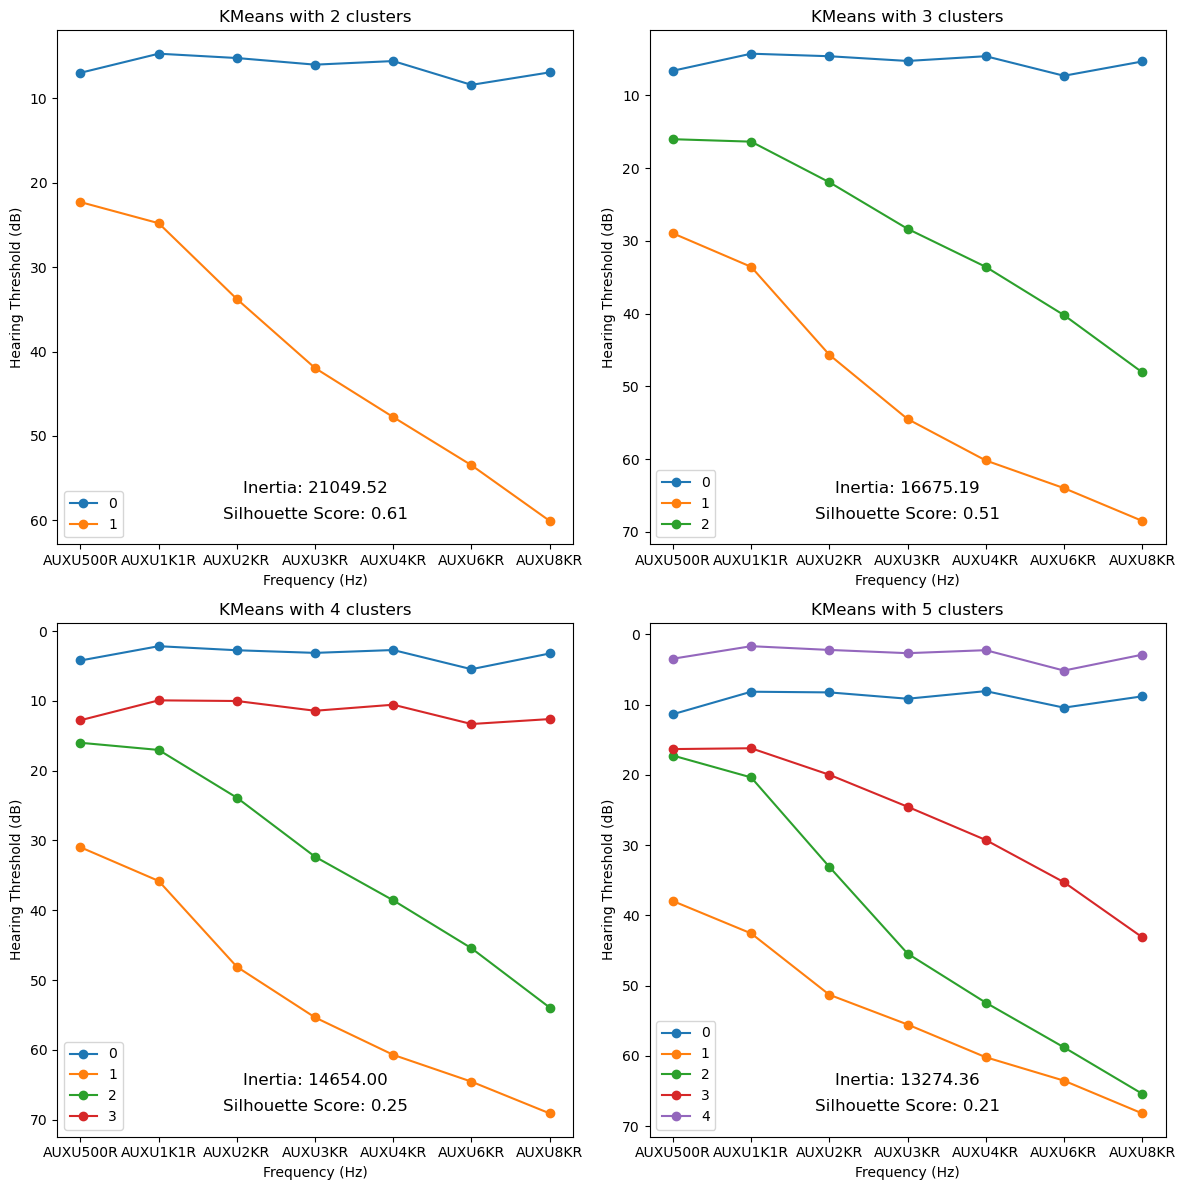

In [14]:
# Fit the K-Means algorithm with n clusters = 2, 3, 4, 5

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i in range(2, 6):
    # Initialize the KMeans object
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(data_scaled)

    # Extract the centroids
    centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    centroids_df = pd.DataFrame(centroids, columns=desired_order)

    # Plot the line plot
    row = (i - 2) // 2
    col = (i - 2) % 2
    ax[row, col].plot(centroids_df.T.iloc[:7,:], marker='o')
    ax[row, col].set_title(f'KMeans with {i} clusters')
    ax[row, col].set_xlabel('Frequency (Hz)')
    ax[row, col].set_ylabel('Hearing Threshold (dB)')
    ax[row, col].invert_yaxis()
    ax[row, col].legend(range(i))

    # Annotate the Silhouette Score
    ax[row, col].annotate(f'Silhouette Score: {silhouette_score(data_scaled, kmeans.labels_):.2f}', 
                          xy=(0.5, 0.05), xycoords='axes fraction', ha='center', fontsize=12)
    
    # Annotate the Inertia
    ax[row, col].annotate(f'Inertia: {kmeans.inertia_:.2f}', 
                          xy=(0.5, 0.10), xycoords='axes fraction', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [10]:
# Replace original values with percentiles

ranked_ear_data = cleaned_data.rank(method='average', pct=True)
ranked_ear_data

,AUXU500R,AUXU1K1R,AUXU2KR,AUXU3KR,AUXU4KR,AUXU6KR,AUXU8KR,AUXU500L,AUXU1K1L,AUXU2KL,AUXU3KL,AUXU4KL,AUXU6KL,AUXU8KL
0,0.342846,0.189210,0.615064,0.379854,0.587047,0.306620,0.642168,0.318087,0.166797,0.035835,0.345713,0.178786,0.299974,0.625749
1,0.756711,0.665494,0.615064,0.379854,0.205108,0.625489,0.092260,0.570758,0.778473,0.367735,0.345713,0.372817,0.136956,0.204457
2,0.856268,0.899010,0.411780,0.379854,0.587047,0.486839,0.543654,0.909956,0.857180,0.367735,0.345713,0.556815,0.479020,0.692598
3,0.342846,0.189210,0.183998,0.379854,0.205108,0.486839,0.642168,0.318087,0.413604,0.035835,0.345713,0.052906,0.136956,0.625749
4,0.342846,0.189210,0.615064,0.574798,0.693250,0.306620,0.232473,0.318087,0.166797,0.151290,0.345713,0.372817,0.299974,0.363174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,0.984232,0.979802,0.976935,0.907871,0.901486,0.823951,0.870341,0.984754,0.985014,0.955955,0.918556,0.890279,0.840240,0.974329
5140,0.342846,0.444879,0.411780,0.379854,0.205108,0.486839,0.398488,0.110112,0.642690,0.583920,0.345713,0.178786,0.615976,0.204457
5141,0.342846,0.189210,0.615064,0.379854,0.205108,0.486839,0.642168,0.853922,0.642690,0.367735,0.345713,0.372817,0.479020,0.363174
5144,0.942664,0.857180,0.411780,0.801798,0.693250,0.782643,0.813526,0.964034,0.926114,0.719833,0.823560,0.774173,0.884806,0.862653


KMeans with 2 clusters: 0.42
KMeans with 3 clusters: 0.27
KMeans with 4 clusters: 0.20
KMeans with 5 clusters: 0.18


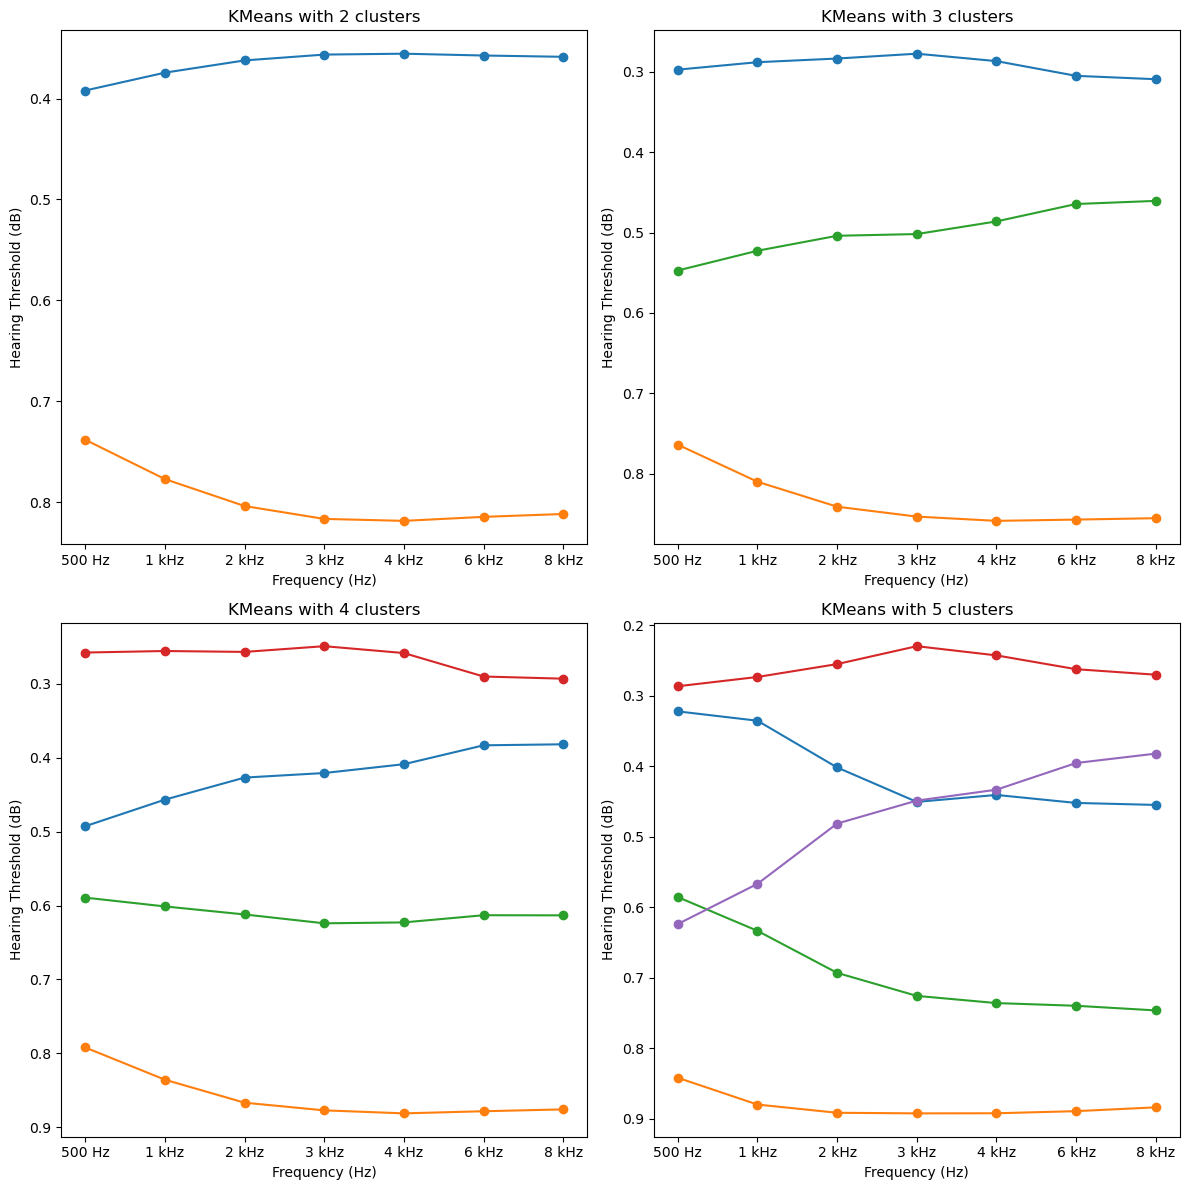

In [13]:
# Fit the K-Means algorithm with n clusters = 2, 3, 4, 5

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i in range(2, 6):
    # Initialize the KMeans object
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(ranked_ear_data)

    # Extract the centroids
    # centroids = scaler.inverse_transform(kmeans.cluster_centers_)
    centroids = kmeans.cluster_centers_
    centroids_df = pd.DataFrame(centroids, columns=['500 Hz', '1 kHz', '2 kHz', '3 kHz', '4 kHz', '6 kHz', '8 kHz',
                                                    '500 HzR', '1 kHzR', '2 kHzR', '3 kHzR', '4 kHzR', '6 kHzR', '8 kHzR'])

    # Plot the line plot
    row = (i - 2) // 2
    col = (i - 2) % 2
    ax[row, col].plot(centroids_df.T.iloc[:7,:], marker='o')
    ax[row, col].set_title(f'KMeans with {i} clusters')
    ax[row, col].set_xlabel('Frequency (Hz)')
    ax[row, col].set_ylabel('Hearing Threshold (dB)')
    ax[row, col].invert_yaxis()

    # Print out the silhouette score
    print(f'KMeans with {i} clusters: {silhouette_score(ranked_ear_data, kmeans.labels_):.2f}')

plt.tight_layout()
plt.show()

# K-Means with 4 clusters

In [8]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original data
cleaned_data['Cluster'] = kmeans.labels_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/7f/kq3rr2cx30nb0pq3qdp9x6740000gn/T/ipykernel_19938/692382317.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cluster'] = kmeans.labels_


In [14]:
# Analyze the cluster distribution
cluster_counts = cleaned_data['Cluster'].value_counts()
print(f"Cluster distribution:\n{cluster_counts}\n")

# Analyze the cluster centroids (mean values for each cluster, exclude 'Cluster' column)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=desired_order)
print(f"Cluster centroids (mean dB levels for each frequency):\n{centroid_df}\n")

Cluster distribution:
Cluster
2    1976
0     981
1     558
3     322
Name: count, dtype: int64

Cluster centroids (mean dB levels for each frequency):
    AUXU500R   AUXU1K1R    AUXU2KR    AUXU3KR    AUXU4KR    AUXU6KR  \
0  12.645260   9.796126   9.872579  11.335372  10.356779  13.149847   
1  16.048387  17.043011  23.808244  32.087814  38.369176  45.232975   
2   4.170040   2.117915   2.710020   3.064271   2.687247   5.407389   
3  30.822981  35.667702  47.965839  55.326087  60.698758  64.580745   

     AUXU8KR   AUXU500L   AUXU1K1L    AUXU2KL    AUXU3KL    AUXU4KL  \
0  12.354740  12.813456  10.152905  10.805301  12.502548  11.630989   
1  53.745520  16.326165  17.930108  26.129032  34.865591  40.940860   
2   3.165486   4.557186   2.722672   3.532389   3.752530   3.345142   
3  69.130435  30.822981  35.978261  49.968944  56.972050  61.878882   

     AUXU6KL    AUXU8KL  
0  13.822630  13.853211  
1  46.657706  55.707885  
2   5.617409   3.970142  
3  64.472050  70.201863  



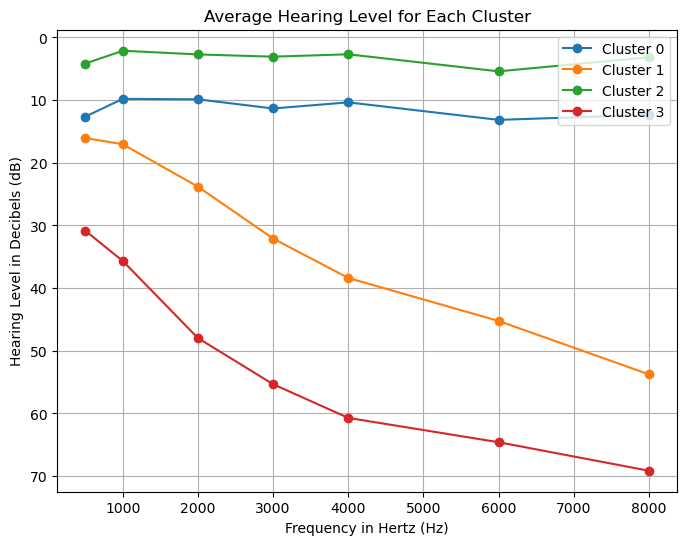

In [17]:
# Correct frequency values (500 Hz to 8000 Hz)
frequencies = [500, 1000, 2000, 3000, 4000, 6000, 8000]

# Plot the cluster centroids
plt.figure(figsize=(8, 6))

for i in range(4):
    plt.plot(frequencies, centroid_df.iloc[i, :7], marker='o', label=f'Cluster {i}')

# Add labels and reverse y-axis
plt.xlabel('Frequency in Hertz (Hz)')
plt.ylabel('Hearing Level in Decibels (dB)')
plt.title('Average Hearing Level for Each Cluster')
plt.gca().invert_yaxis()  # Reverse the y-axis so 0 is at the top
plt.legend(loc='upper right')
plt.grid(True)

# Show plot
plt.show()

# K-Means with 3 clusters

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/7f/kq3rr2cx30nb0pq3qdp9x6740000gn/T/ipykernel_19938/347323186.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cluster_3'] = kmeans_3.labels_


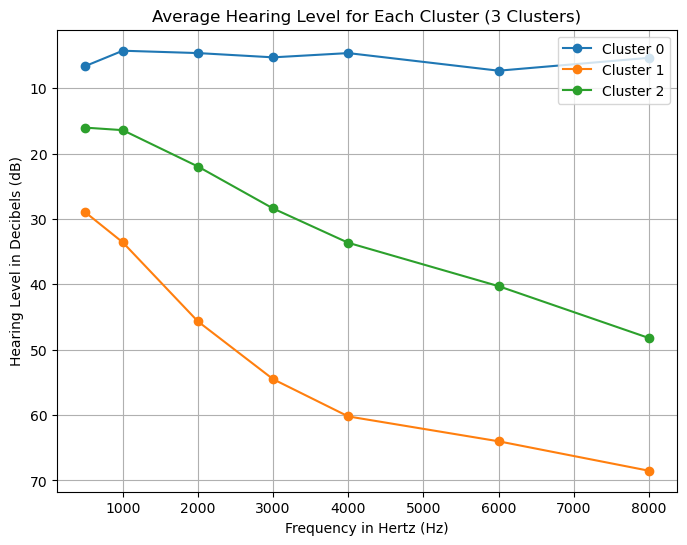

In [23]:
# Apply KMeans clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(data_scaled)

# Add the new cluster labels to the cleaned data
cleaned_data['Cluster_3'] = kmeans_3.labels_

# Analyze the cluster centroids for the 3-cluster solution
centroids_3 = scaler.inverse_transform(kmeans_3.cluster_centers_)
centroid_df_3 = pd.DataFrame(centroids_3, columns=desired_order)

# Plot the cluster centroids with 3 clusters
frequencies = [500, 1000, 2000, 3000, 4000, 6000, 8000]  # Correct frequency values

plt.figure(figsize=(8, 6))

for i in range(3):
    plt.plot(frequencies, centroid_df_3.iloc[i, :7], marker='o', label=f'Cluster {i}')

# Add labels and reverse y-axis
plt.xlabel('Frequency in Hertz (Hz)')
plt.ylabel('Hearing Level in Decibels (dB)')
plt.title('Average Hearing Level for Each Cluster (3 Clusters)')
plt.gca().invert_yaxis()  # Reverse the y-axis so 0 is at the top
plt.legend(loc='upper right')
plt.grid(True)

# Show plot
plt.show()

# K-Means with 2 clusters

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/7f/kq3rr2cx30nb0pq3qdp9x6740000gn/T/ipykernel_19938/157581304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cluster_2'] = kmeans_2.labels_


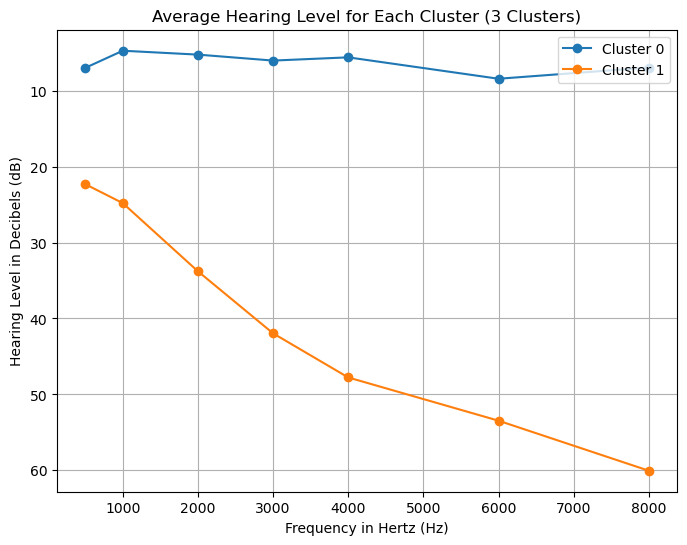

In [24]:
# Apply KMeans clustering with 3 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(data_scaled)

# Add the new cluster labels to the cleaned data
cleaned_data['Cluster_2'] = kmeans_2.labels_

# Analyze the cluster centroids for the 3-cluster solution
centroids_2 = scaler.inverse_transform(kmeans_2.cluster_centers_)
centroid_df_2 = pd.DataFrame(centroids_2, columns=desired_order)

# Plot the cluster centroids with 3 clusters
frequencies = [500, 1000, 2000, 3000, 4000, 6000, 8000]  # Correct frequency values

plt.figure(figsize=(8, 6))

for i in range(2):
    plt.plot(frequencies, centroid_df_2.iloc[i, :7], marker='o', label=f'Cluster {i}')

# Add labels and reverse y-axis
plt.xlabel('Frequency in Hertz (Hz)')
plt.ylabel('Hearing Level in Decibels (dB)')
plt.title('Average Hearing Level for Each Cluster (3 Clusters)')
plt.gca().invert_yaxis()  # Reverse the y-axis so 0 is at the top
plt.legend(loc='upper right')
plt.grid(True)

# Show plot
plt.show()

# K-Means with 5 clusters

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/7f/kq3rr2cx30nb0pq3qdp9x6740000gn/T/ipykernel_19938/2251915599.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cluster_5'] = kmeans_5.labels_


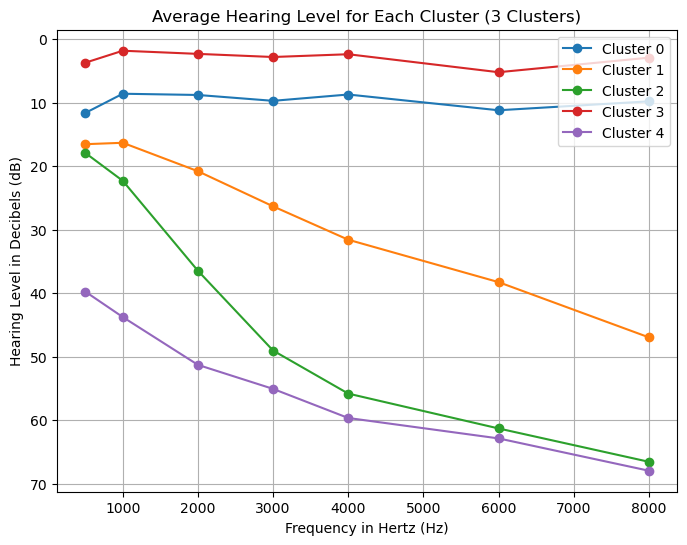

In [25]:
# Apply KMeans clustering with 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5.fit(data_scaled)

# Add the new cluster labels to the cleaned data
cleaned_data['Cluster_5'] = kmeans_5.labels_

# Analyze the cluster centroids for the 3-cluster solution
centroids_5 = scaler.inverse_transform(kmeans_5.cluster_centers_)
centroid_df_5 = pd.DataFrame(centroids_5, columns=desired_order)

# Plot the cluster centroids with 3 clusters
frequencies = [500, 1000, 2000, 3000, 4000, 6000, 8000]  # Correct frequency values

plt.figure(figsize=(8, 6))

for i in range(5):
    plt.plot(frequencies, centroid_df_5.iloc[i, :7], marker='o', label=f'Cluster {i}')

# Add labels and reverse y-axis
plt.xlabel('Frequency in Hertz (Hz)')
plt.ylabel('Hearing Level in Decibels (dB)')
plt.title('Average Hearing Level for Each Cluster (3 Clusters)')
plt.gca().invert_yaxis()  # Reverse the y-axis so 0 is at the top
plt.legend(loc='upper right')
plt.grid(True)

# Show plot
plt.show()

# Use Elbow Method and Silhouette for Finding the "Best" K

```
right_ear_data
left_ear_data
cleaned_data
```

k=1: 53718.000
k=2: 21049.521
k=3: 16675.187
k=4: 14653.998
k=5: 13274.358
k=6: 12493.399
k=7: 11755.493
k=8: 11239.386
k=9: 10926.301
k=10: 10739.318


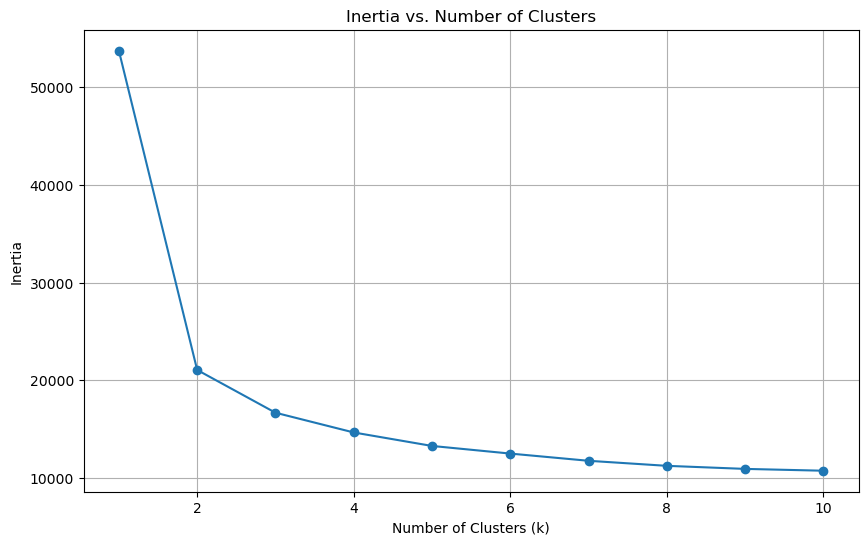

In [43]:
# Use Elbow Method to determine optimal number of clusters

# Initialize a list to store the inertia values
both_inertia_values = []

# Define the range of clusters to try
k_values = range(1, 11)

# Iterate over the range of k values
for k in k_values:
    # Initialize the KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
    kmeans.fit(data_scaled)
    # Append the inertia value to the list
    both_inertia_values.append(kmeans.inertia_)
    print(f'k={k}: {kmeans.inertia_:.3f}')

# Plot the inertia values against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, both_inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.grid(True)
plt.show()

K=2, Silhouette Score=0.608
K=3, Silhouette Score=0.507
K=4, Silhouette Score=0.253
K=5, Silhouette Score=0.207
K=6, Silhouette Score=0.188
K=7, Silhouette Score=0.183
K=8, Silhouette Score=0.140
K=9, Silhouette Score=0.126
K=10, Silhouette Score=0.113


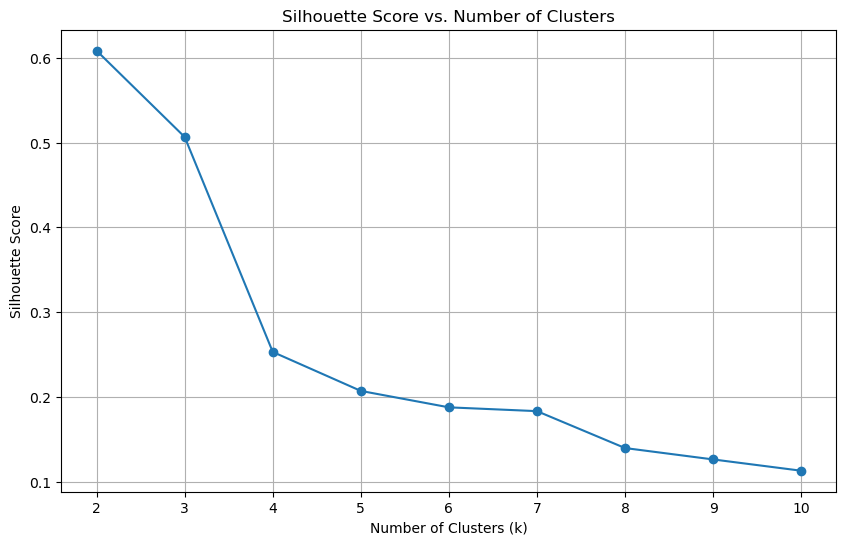

In [44]:
# Use Silhouette Score to determine optimal number of clusters

from sklearn.metrics import silhouette_score

# Initialize a list to store the silhouette scores
both_silhouette_scores = []

# Define the range of clusters to try
k_values = range(2, 11)

# Iterate over the range of k values

for k in k_values:
    # Initialize the KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
    kmeans.fit(data_scaled)
    # Calculate the silhouette score
    score = silhouette_score(data_scaled, kmeans.labels_)
    both_silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.3f}")

# Plot the silhouette scores against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, both_silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

# Experiment with Left Ear Only

K=1, Inertia=26,859.000
K=2, Inertia=10,003.105
K=3, Inertia=7,745.322
K=4, Inertia=6,484.401
K=5, Inertia=5,713.763
K=6, Inertia=5,300.518
K=7, Inertia=4,966.775
K=8, Inertia=4,670.598
K=9, Inertia=4,465.203
K=10, Inertia=4,303.080


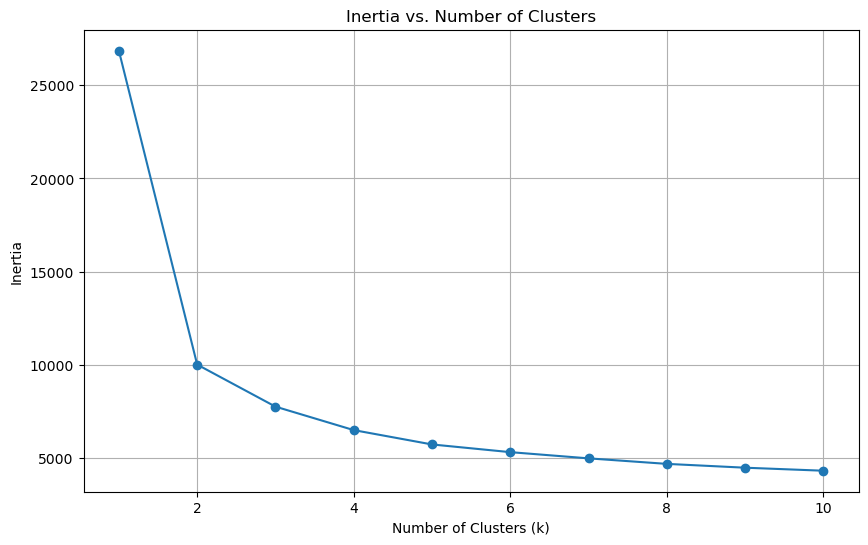

In [45]:
# Use Elbow Method to determine optimal number of clusters

# Initialize a list to store the inertia values
left_inertia_values = []

# Define the range of clusters to try
k_values = range(1, 11)

# Iterate over the range of k values
for k in k_values:
    # Initialize the KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
    kmeans.fit(standardized_left_ear_data)
    # Append the inertia value to the list
    left_inertia_values.append(kmeans.inertia_)
    print(f"K={k}, Inertia={kmeans.inertia_:,.3f}")

# Plot the inertia values against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, left_inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.grid(True)
plt.show()

K=2, Silhouette Score=0.6256041606778499
K=3, Silhouette Score=0.5279399779065158
K=4, Silhouette Score=0.31496019835192
K=5, Silhouette Score=0.25049874126499677
K=6, Silhouette Score=0.25236858864822564
K=7, Silhouette Score=0.18437393739506883
K=8, Silhouette Score=0.1849379137609142
K=9, Silhouette Score=0.17887605170181703
K=10, Silhouette Score=0.1528807552189168


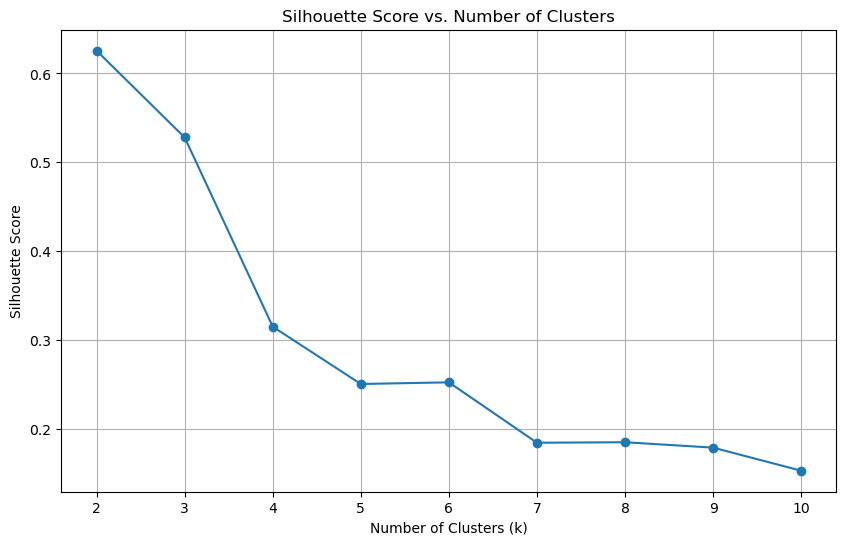

In [46]:
# Use Silhouette Score to determine optimal number of clusters

from sklearn.metrics import silhouette_score

# Initialize a list to store the silhouette scores
left_silhouette_scores = []

# Define the range of clusters to try
k_values = range(2, 11)

# Iterate over the range of k values

for k in k_values:
    # Initialize the KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
    kmeans.fit(standardized_left_ear_data)
    # Calculate the silhouette score
    score = silhouette_score(standardized_left_ear_data, kmeans.labels_)
    left_silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score}")

# Plot the silhouette scores against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, left_silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

# Experiment with Right Ear Only

K=1, Inertia=26,859.000
K=2, Inertia=10,162.414
K=3, Inertia=7,778.395
K=4, Inertia=6,670.345
K=5, Inertia=5,894.212
K=6, Inertia=5,505.812
K=7, Inertia=5,050.733
K=8, Inertia=4,769.717
K=9, Inertia=4,568.213
K=10, Inertia=4,387.299


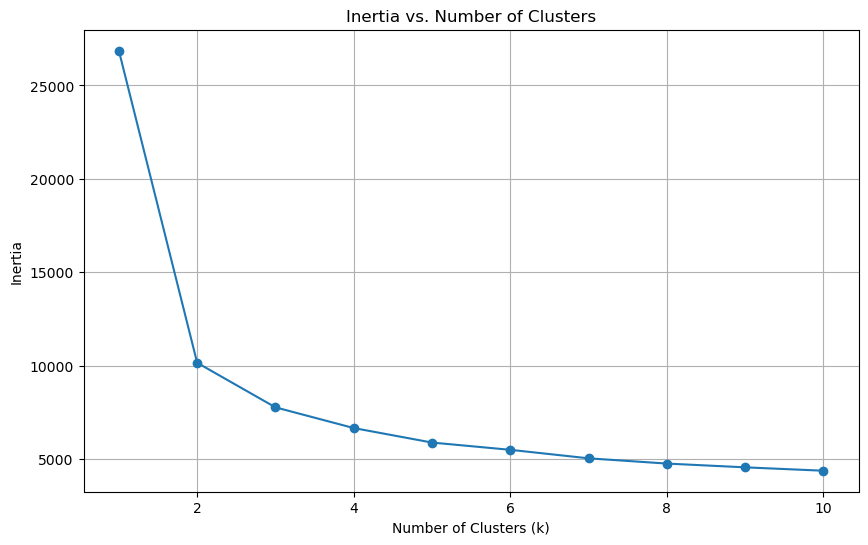

In [47]:
# Use Elbow Method to determine optimal number of clusters

# Initialize a list to store the inertia values
right_inertia_values = []

# Define the range of clusters to try
k_values = range(1, 11)

# Iterate over the range of k values
for k in k_values:
    # Initialize the KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
    kmeans.fit(standardized_right_ear_data)
    # Append the inertia value to the list
    right_inertia_values.append(kmeans.inertia_)
    print(f"K={k}, Inertia={kmeans.inertia_:,.3f}")

# Plot the inertia values against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, right_inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.grid(True)
plt.show()

K=2, Silhouette Score=0.620
K=3, Silhouette Score=0.512
K=4, Silhouette Score=0.291
K=5, Silhouette Score=0.248
K=6, Silhouette Score=0.188
K=7, Silhouette Score=0.186
K=8, Silhouette Score=0.176
K=9, Silhouette Score=0.169
K=10, Silhouette Score=0.164


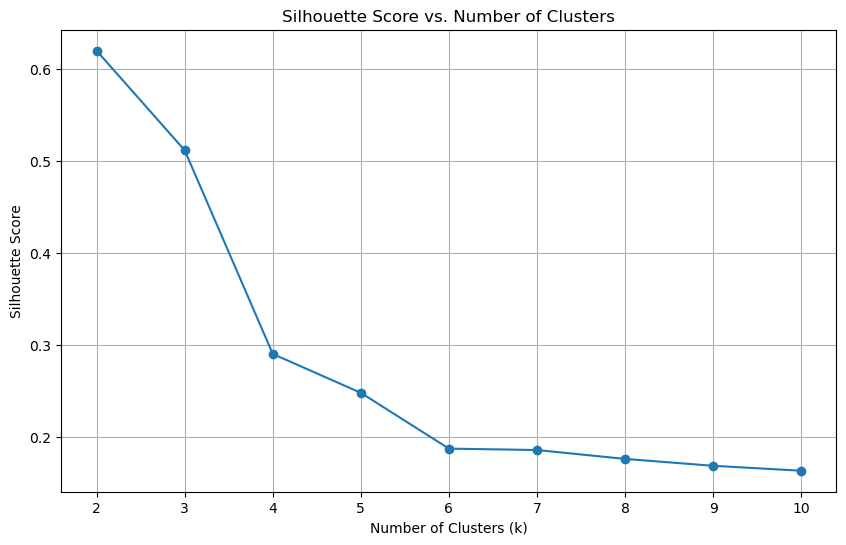

In [48]:
# Use Silhouette Score to determine optimal number of clusters

from sklearn.metrics import silhouette_score

# Initialize a list to store the silhouette scores
right_silhouette_scores = []

# Define the range of clusters to try
k_values = range(2, 11)

# Iterate over the range of k values

for k in k_values:
    # Initialize the KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
    kmeans.fit(standardized_right_ear_data)
    # Calculate the silhouette score
    score = silhouette_score(standardized_right_ear_data, kmeans.labels_)
    right_silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.3f}")

# Plot the silhouette scores against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, right_silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

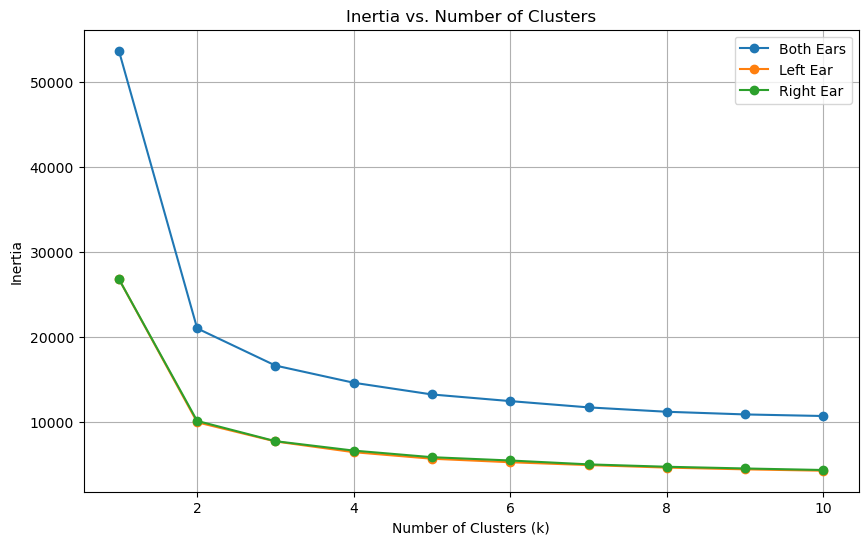

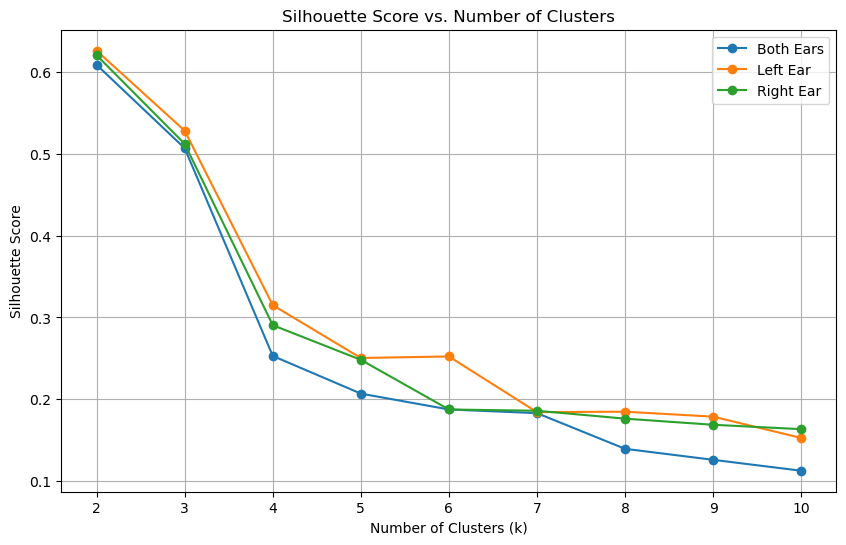

In [54]:
# Compare the inertia values for both ears, left ear, and right ear

# Plot the inertia values for both ears, left ear, and right ear
plt.figure(figsize=(10, 6))
plt.plot(range(1,11), both_inertia_values, marker='o', label='Both Ears')
plt.plot(range(1,11), left_inertia_values, marker='o', label='Left Ear')
plt.plot(range(1,11), right_inertia_values, marker='o', label='Right Ear')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

# Compare the silhouette scores for both ears, left ear, and right ear

# Plot the silhouette scores for both ears, left ear, and right ear

plt.figure(figsize=(10, 6))
plt.plot(range(2,11), both_silhouette_scores, marker='o', label='Both Ears')
plt.plot(range(2,11), left_silhouette_scores, marker='o', label='Left Ear')
plt.plot(range(2,11), right_silhouette_scores, marker='o', label='Right Ear')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

# Weighted Average

In [93]:
# Define weights for left and right ear data
weights = [1.30, 1.40]

# Calculate the weighted average hearing level
weighted_average_hearing = (weights[0] * np.array(left_ear_data) + weights[1] * np.array(right_ear_data)) / sum(weights)

# Convert the weighted average hearing level to a DataFrame
weighted_average_hearing = pd.DataFrame(weighted_average_hearing, columns=frequencies)

weighted_average_hearing.head()

,500,1000,2000,3000,4000,6000,8000
0,5.0,0.0,2.777778,5.0,5.185185,5.0,15.0
1,12.592593,12.407407,7.592593,5.0,2.407407,7.777778,-2.592593
2,22.407407,22.592593,5.0,5.0,10.0,10.0,14.814815
3,5.0,2.407407,-2.407407,5.0,-2.407407,5.185185,15.0
4,5.0,0.0,5.185185,7.592593,10.185185,5.0,2.407407


In [94]:
# Fit KMenas to the weighted average hearing data
scaler = StandardScaler()
weighted_data_scaled = scaler.fit_transform(weighted_average_hearing)

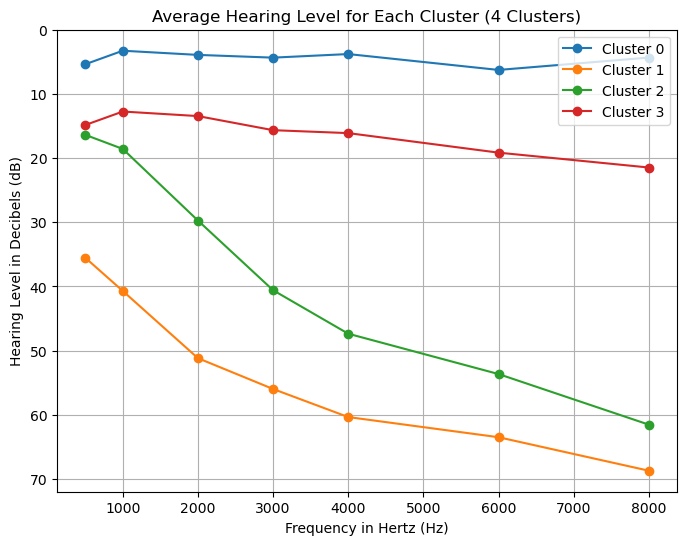

In [95]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init = 'auto')
kmeans.fit(weighted_data_scaled)

# Add the cluster labels to the original data
weighted_average_hearing['Cluster'] = kmeans.labels_

# Analyze the cluster centroids for the 3-cluster solution
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=frequencies)

# Plot the cluster centroids with 4 clusters
frequencies = [500, 1000, 2000, 3000, 4000, 6000, 8000]  # Correct frequency values

plt.figure(figsize=(8, 6))

for i in range(4):
    plt.plot(frequencies, centroid_df.iloc[i, :], marker='o', label=f'Cluster {i}')

# Add labels and reverse y-axis
plt.xlabel('Frequency in Hertz (Hz)')
plt.ylabel('Hearing Level in Decibels (dB)')
plt.title('Average Hearing Level for Each Cluster (4 Clusters)')
plt.gca().invert_yaxis()  # Reverse the y-axis so 0 is at the top
plt.legend(loc='upper right')
plt.grid(True)

# Show plot
plt.show()

K=1, Inertia=26,859.000
K=2, Inertia=9,295.498
K=3, Inertia=6,919.024
K=4, Inertia=5,838.733
K=5, Inertia=5,041.483
K=6, Inertia=4,625.981
K=7, Inertia=4,218.903
K=8, Inertia=3,931.999
K=9, Inertia=3,747.400
K=10, Inertia=3,630.136


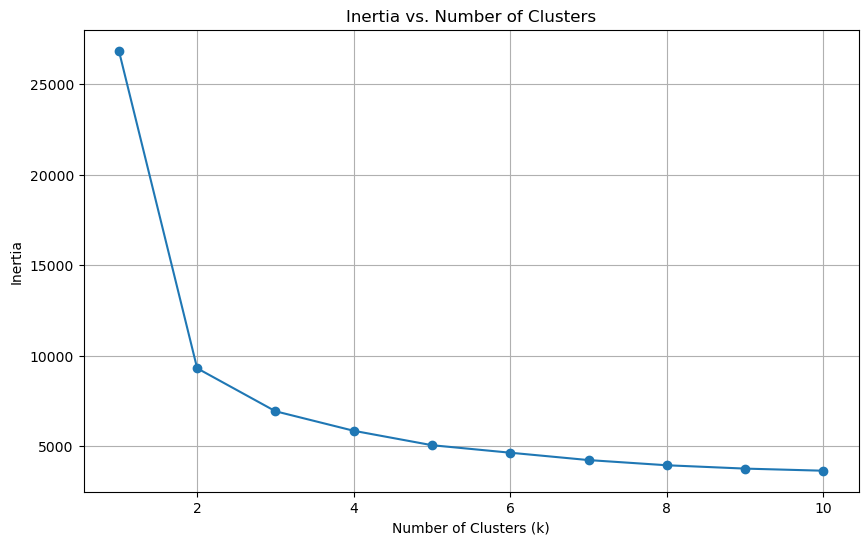

In [96]:
# Use Elbow Method to determine optimal number of clusters

# Initialize a list to store the inertia values
weighted_inertia_values = []

# Define the range of clusters to try
k_values = range(1, 11)

# Iterate over the range of k values
for k in k_values:
    # Initialize the KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
    kmeans.fit(weighted_data_scaled)
    # Append the inertia value to the list
    weighted_inertia_values.append(kmeans.inertia_)
    print(f"K={k}, Inertia={kmeans.inertia_:,.3f}")

# Plot the inertia values against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, weighted_inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.grid(True)
plt.show()

K=2, Silhouette Score=0.6442973184524936
K=3, Silhouette Score=0.5504800721294215
K=4, Silhouette Score=0.38131620578680414
K=5, Silhouette Score=0.2760560168944628
K=6, Silhouette Score=0.25004201820005595
K=7, Silhouette Score=0.26166263951442004
K=8, Silhouette Score=0.19950306591550854
K=9, Silhouette Score=0.19286316187161004
K=10, Silhouette Score=0.18222479217245635


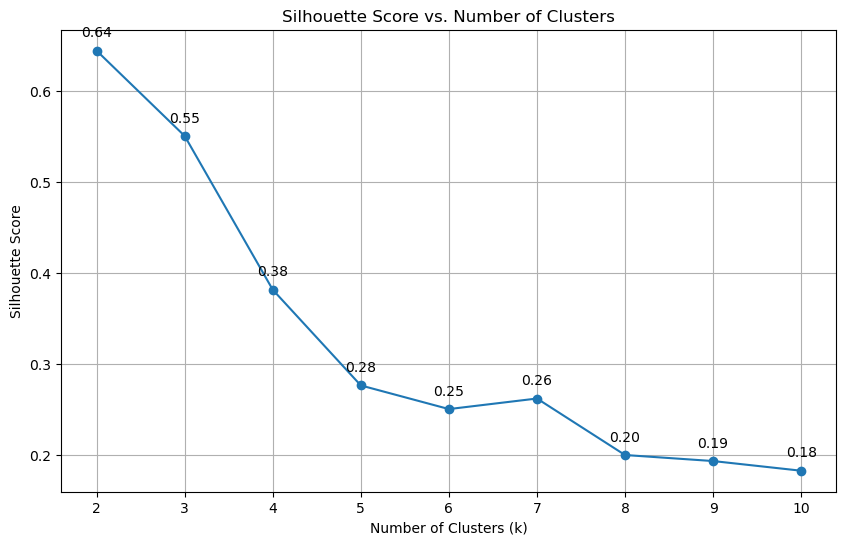

In [98]:
# Use Silhouette Score to determine optimal number of clusters

from sklearn.metrics import silhouette_score

# Initialize a list to store the silhouette scores
weighted_silhouette_scores = []

# Define the range of clusters to try
k_values = range(2, 11)

# Iterate over the range of k values

for k in k_values:
    # Initialize the KMeans object with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
    kmeans.fit(weighted_data_scaled)
    # Calculate the silhouette score
    score = silhouette_score(weighted_data_scaled, kmeans.labels_)
    weighted_silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score}")

# Plot the silhouette scores against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, weighted_silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)

for x,y in zip(k_values,weighted_silhouette_scores):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

## Grid search with the weighted average

In [82]:
# Grid Search for optimal weights for left and right ear data

# Define a range of weights to try
left_weights = np.linspace(0.1, 2.0, 20)
right_weights = np.linspace(0.1, 2.0, 20)

# Initialize variables to store the best weights and silhouette score
best_left_weight = 0
best_right_weight = 0
best_silhouette = -1

# Iterate over all combinations of weights
for left_weight in left_weights:
    for right_weight in right_weights:
        # Calculate the weighted average hearing level
        weighted_average_hearing = (left_weight * np.array(left_ear_data) + right_weight * np.array(right_ear_data)) / (left_weight + right_weight)
        # Convert the weighted average hearing level to a DataFrame
        weighted_average_hearing = pd.DataFrame(weighted_average_hearing, columns=frequencies)
        # Standardize the data
        weighted_data_scaled = scaler.fit_transform(weighted_average_hearing)
        # Perform KMeans clustering
        kmeans = KMeans(n_clusters=4, random_state=42, n_init = 'auto')
        kmeans.fit(weighted_data_scaled)
        # Calculate the silhouette score
        score = silhouette_score(weighted_data_scaled, kmeans.labels_)
        # Update the best weights and silhouette score if the current score is higher
        if score > best_silhouette:
            best_silhouette = score
            best_left_weight = left_weight
            best_right_weight = right_weight

# Print the best weights and silhouette score
print(f"Best Weights: Left={best_left_weight:.2f}, Right={best_right_weight:.2f}, Silhouette Score={best_silhouette:.4f}")

Best Weights: Left=1.30, Right=1.40, Silhouette Score=0.3813
